Tugas ini berupa Tugas Akhir yang diselesaikan pada Akhir Pekan 8. Tugas disusun sesuai dengan materi yang diberikan tiap harinya dari pekan 1-8.

# Dataset

silahkan unduh dataset berikut untuk mengerjakan Tugas Akhir:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
df = pd.read_csv('pelanggan_supermarket.csv')
umur = 'Umur'
skor = 'Skor Belanja (1-100)' #untuk menyingkat kode
pdpt = 'Pendapatan pertahun (juta)' #untuk menyingkat kode
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [35]:
#code here
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

Give your analysis:

Bisa kita lihat bahwa kolom Umur dan Skor Belanja masing-masing memiliki jumlah count yang lebih kecil dari kolom-kolom lainnya, artinya besar kemungkinan bahwa ada *missing value* di kolom-kolom tersebut.

---
Selain itu jarak antara data max dan data di *percentile* 75% pada kolom-kolom selain ID pelanggan memiliki jarak yang signifikan, artinya besar kemungkinan bahwa terdapat data-data outlier.


---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [36]:
#code here
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [37]:
df_ffill = df.fillna(method='ffill')
df_ffill.isna().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64



---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

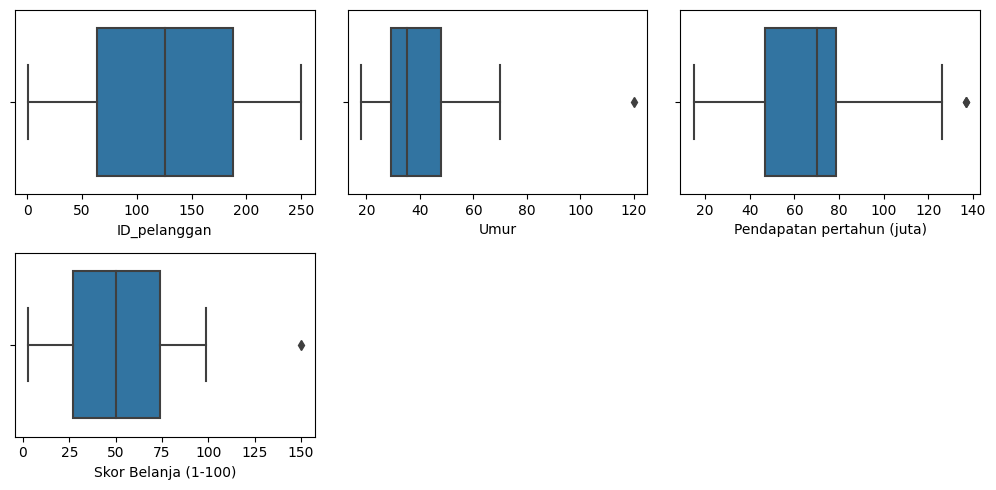

In [38]:
#code here

columns = [i for i in df_ffill.columns]
columns.remove('Jenis Kelamin')

plt.figure(figsize=(10,5))
for i,col in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df_ffill,x=col,orient='h')
    
plt.tight_layout()

**Concl:** Bisa kita lihat adanya data *outlier* pada kolom Umur, Pendapatan, dan Skor. Semua data *outlier* lebih besar dari batas atas data, tidak ada data *outlier* yang lebih rendah dari batas bawah data.

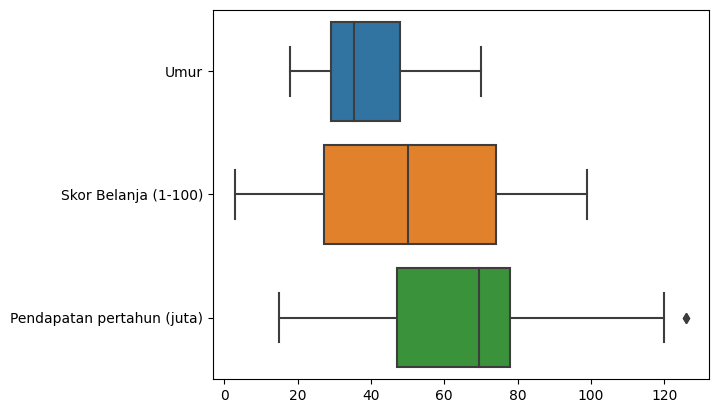

In [39]:
#Handling outlier 
data_outlier = df_ffill[[umur,skor,pdpt]]

q1 = data_outlier.quantile(0.25)
q3 = data_outlier.quantile(0.75)
iqr = (q3-q1)*1.5

ub = q3+iqr

df2 = data_outlier[(df_ffill[umur]<ub[umur]) & (df_ffill[skor]<ub[skor]) & (df_ffill[pdpt]<ub[pdpt])]

sns.boxplot(data=df2,orient='h')
plt.show()

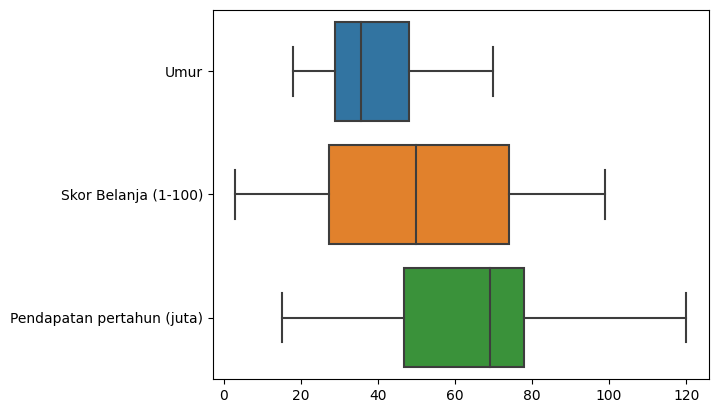

In [40]:
#Kolom pendapatan masih terdapat outlier, kita lakukan lagi handling seperti diatas

outlier_pdpt = df2[[pdpt]]

q1_pdpt = outlier_pdpt.quantile(0.25)
q3_pdpt = outlier_pdpt.quantile(0.75)
iqr_pdpt = (q3_pdpt-q1_pdpt)*1.5

ub_pdpt = q3_pdpt+iqr_pdpt

df_pdpt = df2[outlier_pdpt<ub_pdpt] #filter outlier

df2[pdpt] = df_pdpt[pdpt] #menggabung hasil ke dataframe awal

sns.boxplot(data=df2,orient='h')
plt.show()

**concl:** Data sudah tidak memiliki *outlier*

**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [41]:
df_100 = df2.sample(100,  random_state=1)
df_100.dtypes

Umur                          float64
Skor Belanja (1-100)          float64
Pendapatan pertahun (juta)    float64
dtype: object

In [42]:
df_umur = df_100[umur].astype(int)
df_umur.dtypes

dtype('int32')

In [43]:
#code here for z-test
zval, pval = ztest(df_umur, value=35,alternative='larger') 

print('Hipotesis adalah: rata2 usia pengunjung supermarket di atas 35 tahun')
print('Hipotesis tidak diterima') if zval>1.64 else print('Hipotesis diterima')

Hipotesis adalah: rata2 usia pengunjung supermarket di atas 35 tahun
Hipotesis tidak diterima


In [44]:
#code here for p-value
print('Hipotesis adalah: rata2 usia pengunjung supermarket di atas 35 tahun')
print('Hipotesis tidak diterima') if pval<0.05 else print('Hipotesis diterima')

Hipotesis adalah: rata2 usia pengunjung supermarket di atas 35 tahun
Hipotesis tidak diterima


Give your analysis:

Dengan menggunakan *library* `statsmodels` dan formula `ztest`, kita bisa menghitung nilai z-test dan p-value secara sekaligus. Dari nilai-nilai yang telah dihitung oleh kode, bisa disimpulkan bahwa hipotesis tidak terbukti, dengan kata lain rata-rata umur pengunjung supermarket adalah di bawah 35 tahun.

---



---



---



## Soal 5. EDA

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

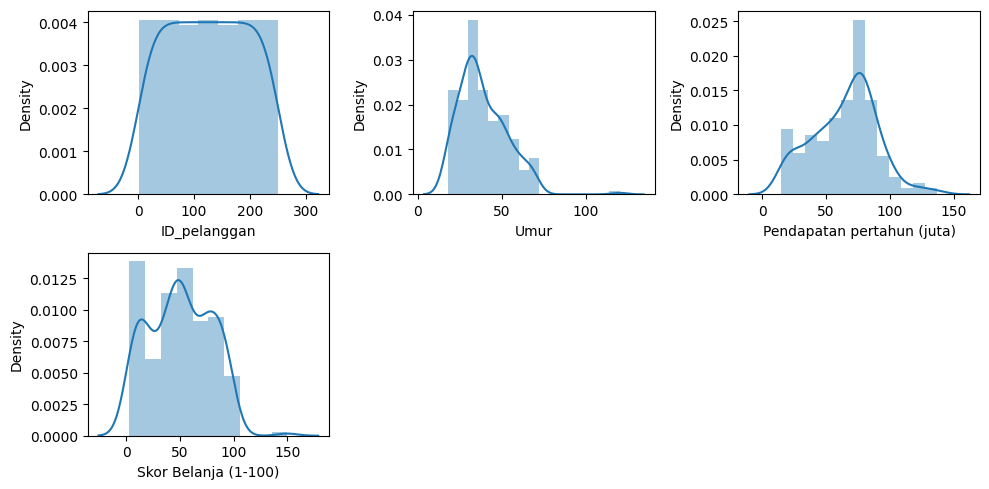

In [45]:
#code here for univariate

columns = [i for i in df.columns] #definisi variabel ulang untuk menghindari error kode
columns.remove('Jenis Kelamin')

plt.figure(figsize=(10,5))
for i,col in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])

plt.tight_layout()

Give your analysis:

Distribusi ID_pelanggan hampir rata, artinya sebagian besar data terdiri dari nilai unik. Untuk umur dan skor belanja, kita bisa lihat jelas nilai-nilai outlier, sesuai dengan hasil figur boxplot diatas. Untul pendapatan pertahun, nilai outlier kurang jelas terlihat.

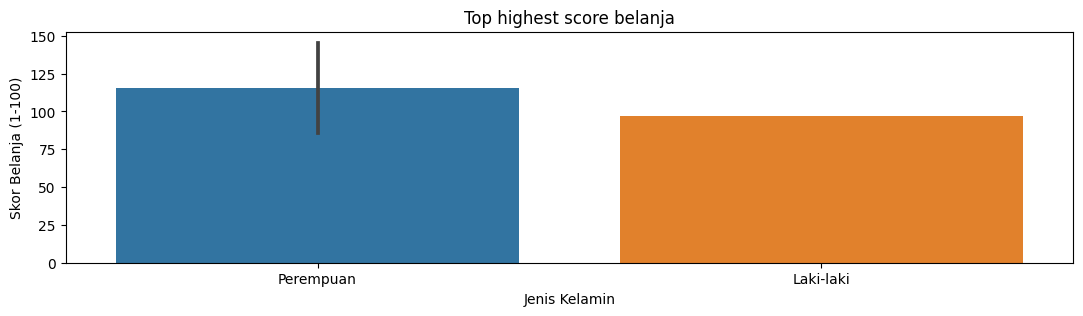

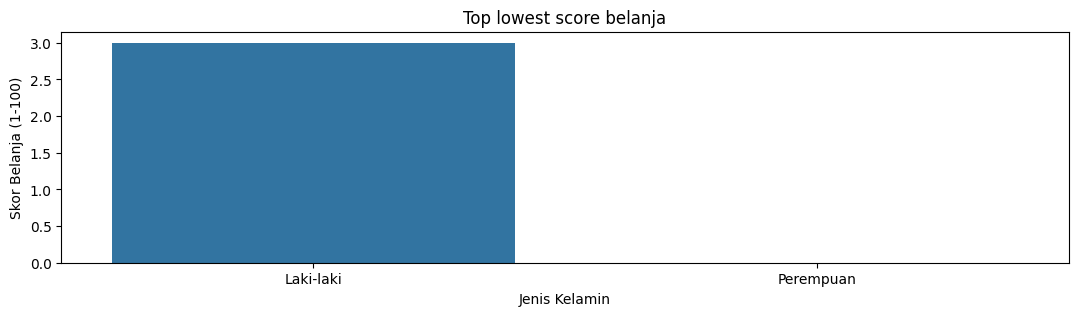

In [46]:
#code here for bivariate

df_max = df.nlargest(5,skor)
df_min = df.nsmallest(1,skor)
df_min.append(df_min).reset_index()
df_min.loc[1,'Jenis Kelamin'] = 'Perempuan'
df_min.loc[1,skor] = 0

plt.figure(figsize=(13,3))
sns.barplot(data=df_max,x='Jenis Kelamin',y=skor,errorbar="sd").set(title='Top highest score belanja')
plt.yticks(range(0,155,25))
plt.show()
plt.figure(figsize=(13,3))
sns.barplot(data=df_min,x='Jenis Kelamin',y=skor,errorbar="sd").set(title='Top lowest score belanja')
plt.show()

Give your analysis:
    
Bisa kita lihat untuk 5 skor tertinggi, hanya ada satu skor laki-laki sebab *barplot* yang muncul tidak memiliki errorbar. Selain itu, skor-skor tertinggi perempuan lebih tinggi dari skor tertinggi laki-laki. *Mean* dari data skor-skor tertinggi untuk pelanggan perempuan berkisar di sekitar 120, dan standard deviasi nya berkisaran antara 80 sampai 150.

Adapun skor terendah adalah skor 3 untuk seorang pelanggan laki-laki. Pada barplot *top lowest score* diatas bar untuk pelanggan perempuan tidak tergambar sebab skor terendah memang dimiliki oleh pelanggan laki-laki.

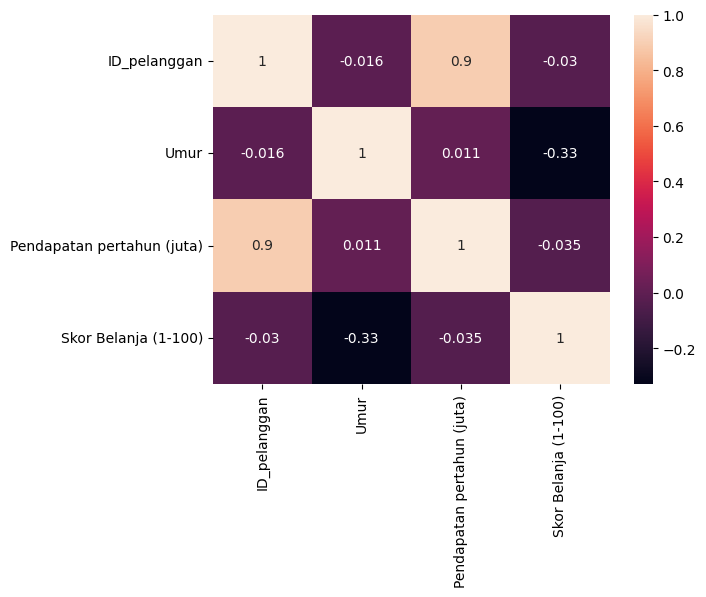

In [47]:
#code here for multivariate

sns.heatmap(df.corr(), annot=True)
plt.show()

Give your analysis:

Seperti yang terpampang di *heatmap* di atas, korelasi paling penting ada pada hubungan antara variabel ID pelanggan dan Pendapatah per tahun. Akan tetapi ID pelanggan bukanlah variabel yang menarik untuk statistik, sebab variabel ini hanya berfungsi untuk mengidentifikasi pelanggan dan tidak tergantung pada kondisi apapun. Oleh karena itu korelasi ini, meski tinggi tidak berarti apa-apa.

Di sisi lain variabel umur dengan skor belanja memiliki korelasi negatif yang lemah, dengan persentase korelasi antara 10-50%. 

Untuk hubungan-hunungan antar variabel lainnya semua memiliki koefisien korelasi kurang dari 10%, artinya korelasi yang ada bisa diabaikan.

**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/file/d/1aNLD2M9a-d63sVkCqN7n475LQ8NqSsi1/)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





# Soal 6. Data scaling
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [48]:
#code here

data = df2[[umur,skor]]
x_array = np.array(data)
scaler = StandardScaler()
scale_data = scaler.fit_transform(x_array)
df_scaled = pd.DataFrame(scale_data, columns=data.columns)
df_scaled

,Umur,Skor Belanja (1-100)
0,-1.455408,-0.396862
1,-1.305038,1.121236
2,-1.380223,-1.589654
3,-1.154669,0.976655
4,-0.553190,-0.360717
...,...,...
241,-0.853929,0.687493
242,1.551987,-1.300492
243,-0.252450,1.446542
244,-0.102080,-0.649879




---



---



---



# Soal 7. Clustering menggunakan k-menas

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

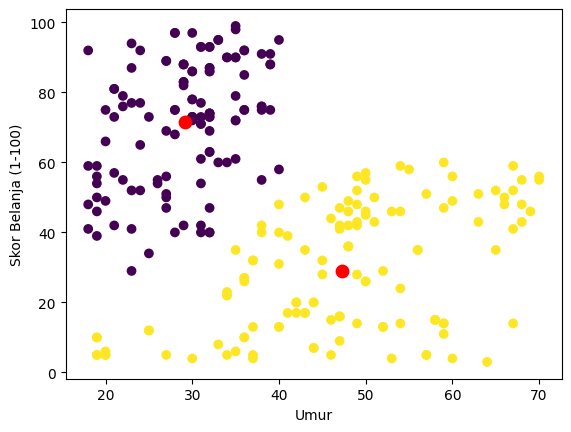

In [49]:
#code here 
#Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
kmeans_label2 = KMeans(n_clusters=2, random_state=20, n_init=10).fit(df_scaled)
df2['label2'] = kmeans_label2.labels_

plt.scatter(df2.Umur,df2[skor],c=df2.label2)
plt.xlabel(umur)
plt.ylabel(skor)

centroids = scaler.inverse_transform(kmeans_label2.cluster_centers_)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'red')

plt.show()

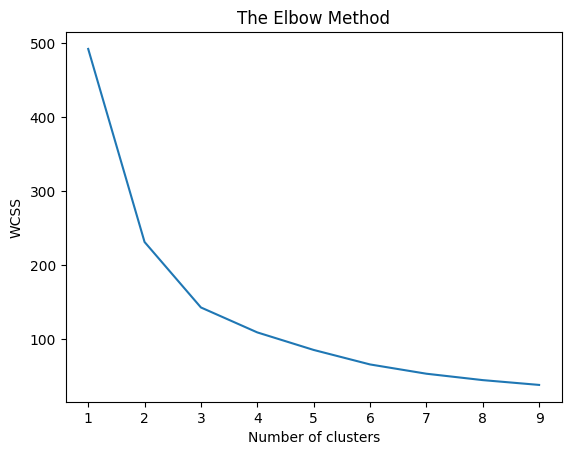

In [50]:
#code here
#Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
sum_of_squared_distances = []
K = range(1,10)
for k in K:
  km = KMeans(n_clusters=k, random_state=20).fit(df_scaled)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

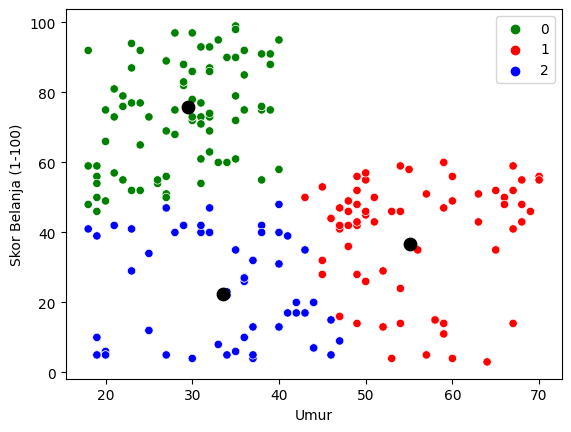

In [53]:
#code here
#Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
kmeans_label3 = KMeans(n_clusters=3, random_state=20, n_init=10).fit(df_scaled)
df2['label3'] = kmeans_label3.labels_

sns.scatterplot(x=umur, y=skor, hue='label3', palette=['green','red','blue'], data=df2);
plt.legend(loc='upper right');

centroids = scaler.inverse_transform(kmeans_label3.cluster_centers_)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')

plt.show()

**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [54]:
#silhoutte score
#Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut
k2 = silhouette_score(df2[[umur,skor]],labels=df2['label2'])
k3 = silhouette_score(df2[[umur,skor]],labels=df2['label3'])

print('Silhoutte Score untuk k = 2 adalah',k2)
print('Silhoutte Score untuk k = 3 adalah',k3)

Silhoutte Score untuk k = 2 adalah 0.47929040741336076
Silhoutte Score untuk k = 3 adalah 0.4211388463036255




---



---



---



# Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket

Secara visual dari *Elbow method* bisa kita lihat bahwa jumlah cluster ideal untuk data kita ada diantara k=2 dan k=3. Dengan menghitung silhouette score dari kedua k tersebut, kita temukan bahwa k=2 memiliki score lebih tinggi, yang artinya k=2 memiliki cluster yang lebih baik.

Apabila kita perhatikan grafik clustering dengan 2 cluster, bisa kita simpulkan bahwa data terbagi menjadi dua kelompok dengan fitur sebagai berikut: satu kelompok yang umur dibawah 40 dengan skor tinggi dari sekitar 25, serta satu kelompok dengan skor rendah dibawah 60 dab umur beragam.